In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Step 1: Generate Synthetic Data
np.random.seed(42)
num_periods = 20
capital_calls = np.random.uniform(50000, 150000, num_periods)
returns = np.random.uniform(0.08, 0.20, num_periods)
pref_rate = 0.08  # Preferred return rate
catch_up = 0.2  # GP catch-up percentage
carried_interest = 0.2  # GP carried interest


In [3]:
# Calculate distributions
lp_distribution = np.cumsum(capital_calls * returns * (1 - carried_interest))
gp_distribution = np.cumsum(capital_calls * returns * carried_interest)
total_distribution = lp_distribution + gp_distribution

In [4]:
# Create DataFrame for modeling
waterfall_data = pd.DataFrame({
    'Period': np.arange(1, num_periods + 1),
    'Capital Calls': capital_calls,
    'Returns': returns,
    'LP Distribution': lp_distribution,
    'GP Distribution': gp_distribution,
    'Total Distribution': total_distribution
})


In [7]:
# Step 2: Train Gradient Boosted Decision Trees (GBDT) Model
X = waterfall_data[['Period', 'Capital Calls']]
y = waterfall_data['Returns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predict future returns
future_periods = pd.DataFrame({'Period': np.arange(num_periods + 1, num_periods + 6), 'Capital Calls': np.random.uniform(50000, 150000, 5)})
future_returns = model.predict(future_periods)

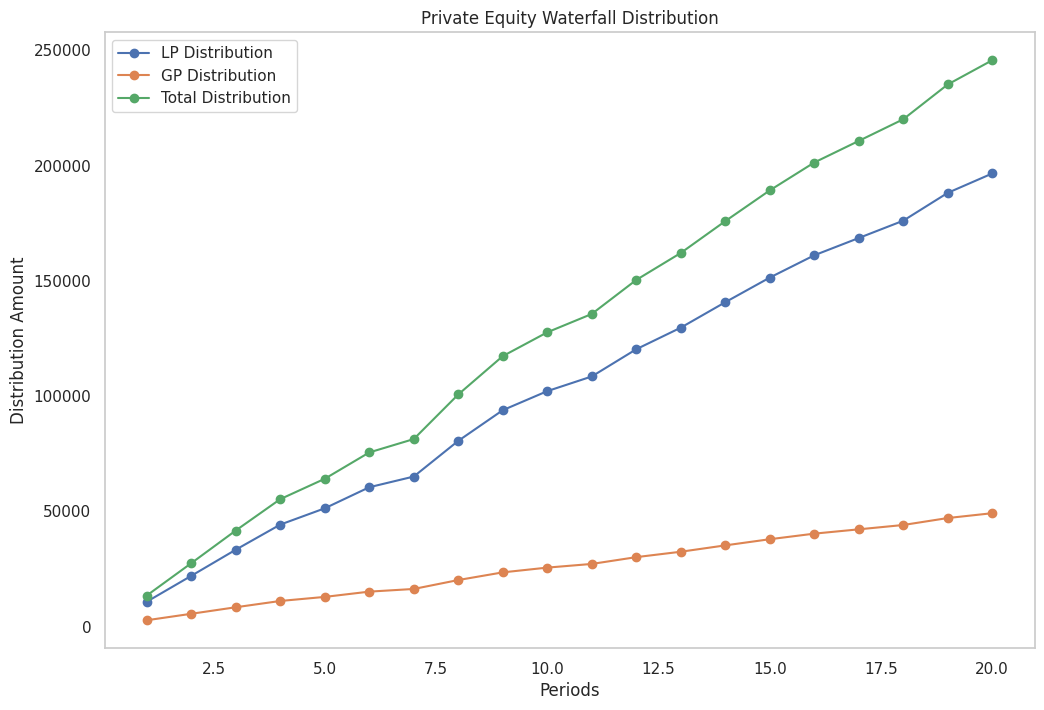

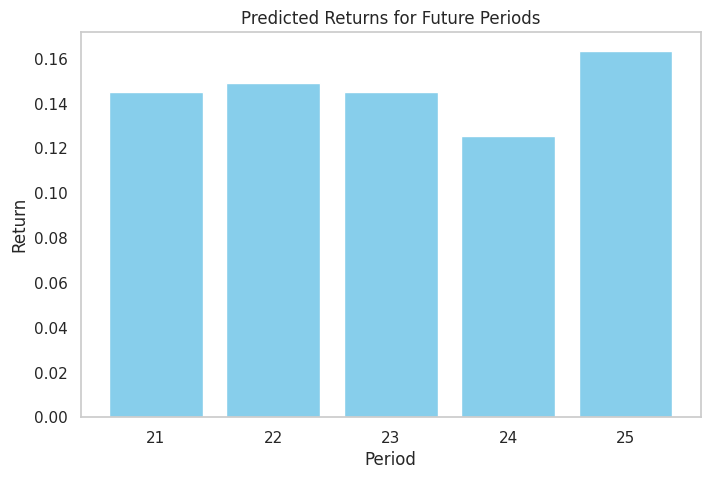

In [8]:
# Step 3: Visualizations
sns.set(style="whitegrid")

# Waterfall Distribution Visualization
plt.figure(figsize=(12, 8))
plt.plot(waterfall_data['Period'], waterfall_data['LP Distribution'], label='LP Distribution', marker='o')
plt.plot(waterfall_data['Period'], waterfall_data['GP Distribution'], label='GP Distribution', marker='o')
plt.plot(waterfall_data['Period'], waterfall_data['Total Distribution'], label='Total Distribution', marker='o')
plt.title('Private Equity Waterfall Distribution')
plt.xlabel('Periods')
plt.ylabel('Distribution Amount')
plt.legend()
plt.grid()
plt.show()

# Future Returns Visualization
plt.figure(figsize=(8, 5))
plt.bar(future_periods['Period'], future_returns, color='skyblue')
plt.title('Predicted Returns for Future Periods')
plt.xlabel('Period')
plt.ylabel('Return')
plt.grid()
plt.show()

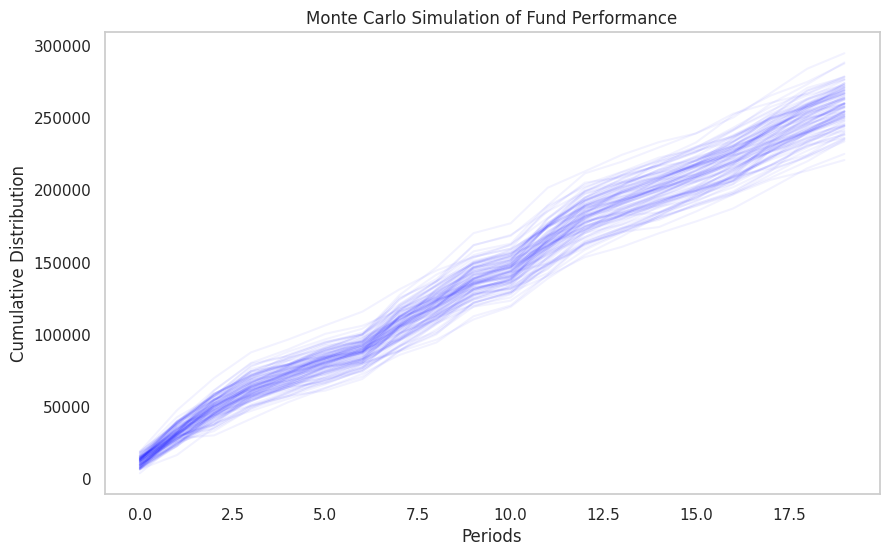

,Period,Capital Calls,Returns,LP Distribution,GP Distribution,Total Distribution
0,1,87454.011885,0.153422,10733.919832,2683.479958,13417.399790
1,2,145071.430641,0.096739,21961.202490,5490.300623,27451.503113
2,3,123199.394181,0.115057,33301.199914,8325.299979,41626.499893
3,4,109865.848420,0.123963,44196.677068,11049.169267,55245.846336
4,5,65601.864044,0.134728,51267.424313,12816.856078,64084.280391


In [9]:
mc_simulations = 10000
random_returns = np.random.normal(np.mean(returns), np.std(returns), (mc_simulations, num_periods))
cumulative_distributions = np.cumsum(random_returns * capital_calls.reshape(1, -1), axis=1)

plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(cumulative_distributions[i], alpha=0.05, color='blue')
plt.title('Monte Carlo Simulation of Fund Performance')
plt.xlabel('Periods')
plt.ylabel('Cumulative Distribution')
plt.grid()
plt.show()

# Display the first few rows of the data
display(waterfall_data.head())
